# 패키지 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib_inline.backend_inline import set_matplotlib_formats

plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 그래프가 노트북 안에 보이게 설정
%matplotlib inline

# 폰트 선명하게 보이게 설정
set_matplotlib_formats('retina')

# 데이터 불러오기
- e: 추정치
- p: 잠정치
- -: 자료 없음
- ...: 미상자료
- x: 비밀보호
- ▽: 시계열 불연

In [23]:
df_raw = pd.read_csv("./data/101_DT_1KE10081_20240819131327.csv", encoding="cp949")

df_raw = df_raw.drop(['Unnamed: 47', '항목', '단위'], axis = 1)

In [24]:
df_raw.columns

Index(['지역별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4', '2014.4/4',
       '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4', '2016.2/4',
       '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4',
       '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4',
       '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4', '2020.4/4',
       '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4', '2022.1/4', '2022.2/4',
       '2022.3/4', '2022.4/4', '2023.1/4', '2023.2/4', '2023.3/4', '2023.4/4',
       '2024.1/4', '2024.2/4'],
      dtype='object')

# tidy data 만들기: melt()

In [71]:
# id_vars = 유지할 컬럼명
# var_name = 변수 이름을 저장할 새 열의 이름
# value_name = 값을 저장할 새 열의 이름
df= df_raw.melt(id_vars=["지역별", "상품군별", "판매유형별"],
                var_name="기간",
                value_name="백만원")

In [60]:
df.shape

(40698, 5)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40698 entries, 0 to 40697
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역별     40698 non-null  object
 1   상품군별    40698 non-null  object
 2   판매유형별   40698 non-null  object
 3   기간      40698 non-null  object
 4   백만원     26412 non-null  object
dtypes: object(5)
memory usage: 1.6+ MB


# 데이터 전처리

## map()

In [72]:
# 연도 분리
df["연도"] = df["기간"].map(lambda x: int(x.split(".")[0]))

# 분기 분리
df["분기"] = df["기간"].map(lambda x: int(x.split(".")[1].split("/")[0]))

# 금액 type 변경
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)

## 필요 없는 컬럼 제거

In [73]:
df = df[(df["지역별"] != "합계") & (df["상품군별"] != "합계")].copy()

## 결측치 확인

In [75]:
df.isnull().sum()

지역별          0
상품군별         0
판매유형별        0
기간           0
백만원      20808
연도           0
분기           0
dtype: int64

# 시각화

In [80]:
df_total = df[df["판매유형별"] == "계"].copy()

<AxesSubplot:xlabel='연도', ylabel='백만원'>

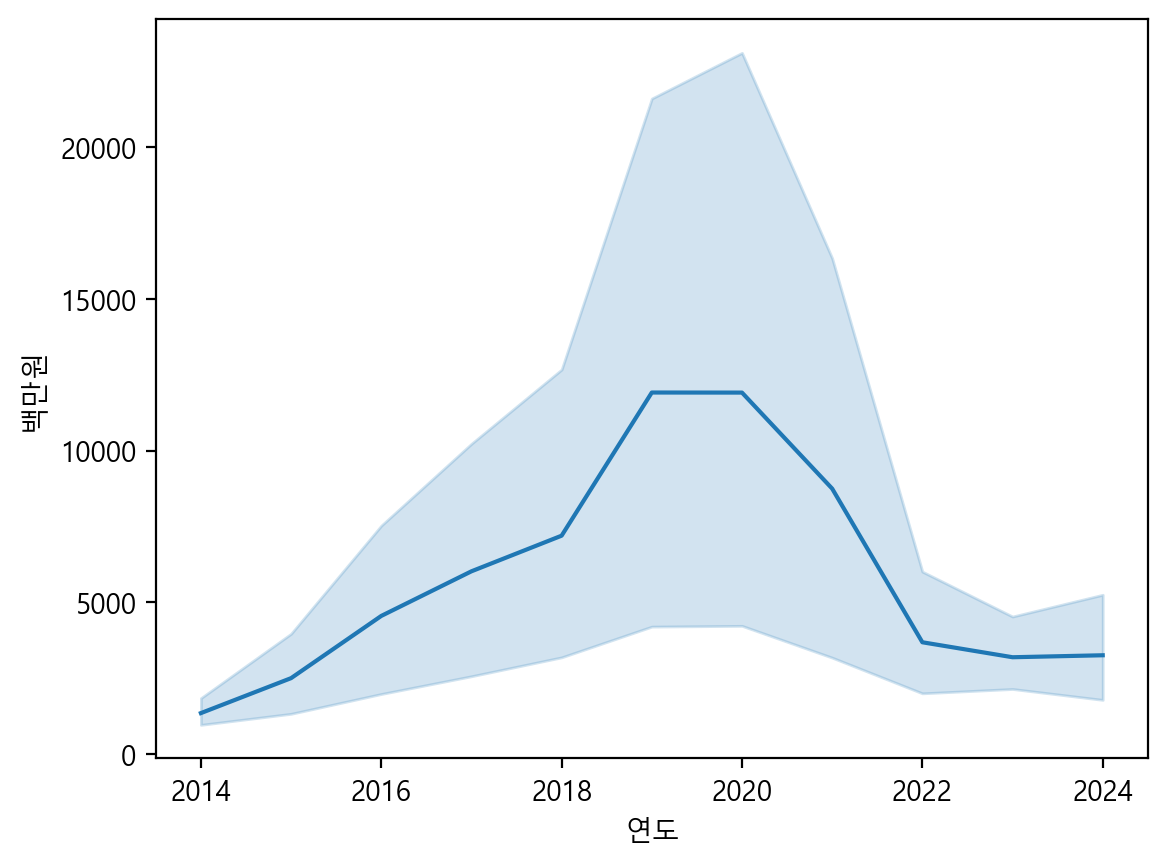

In [82]:
sns.lineplot(data=df_total, x="연도", y="백만원")

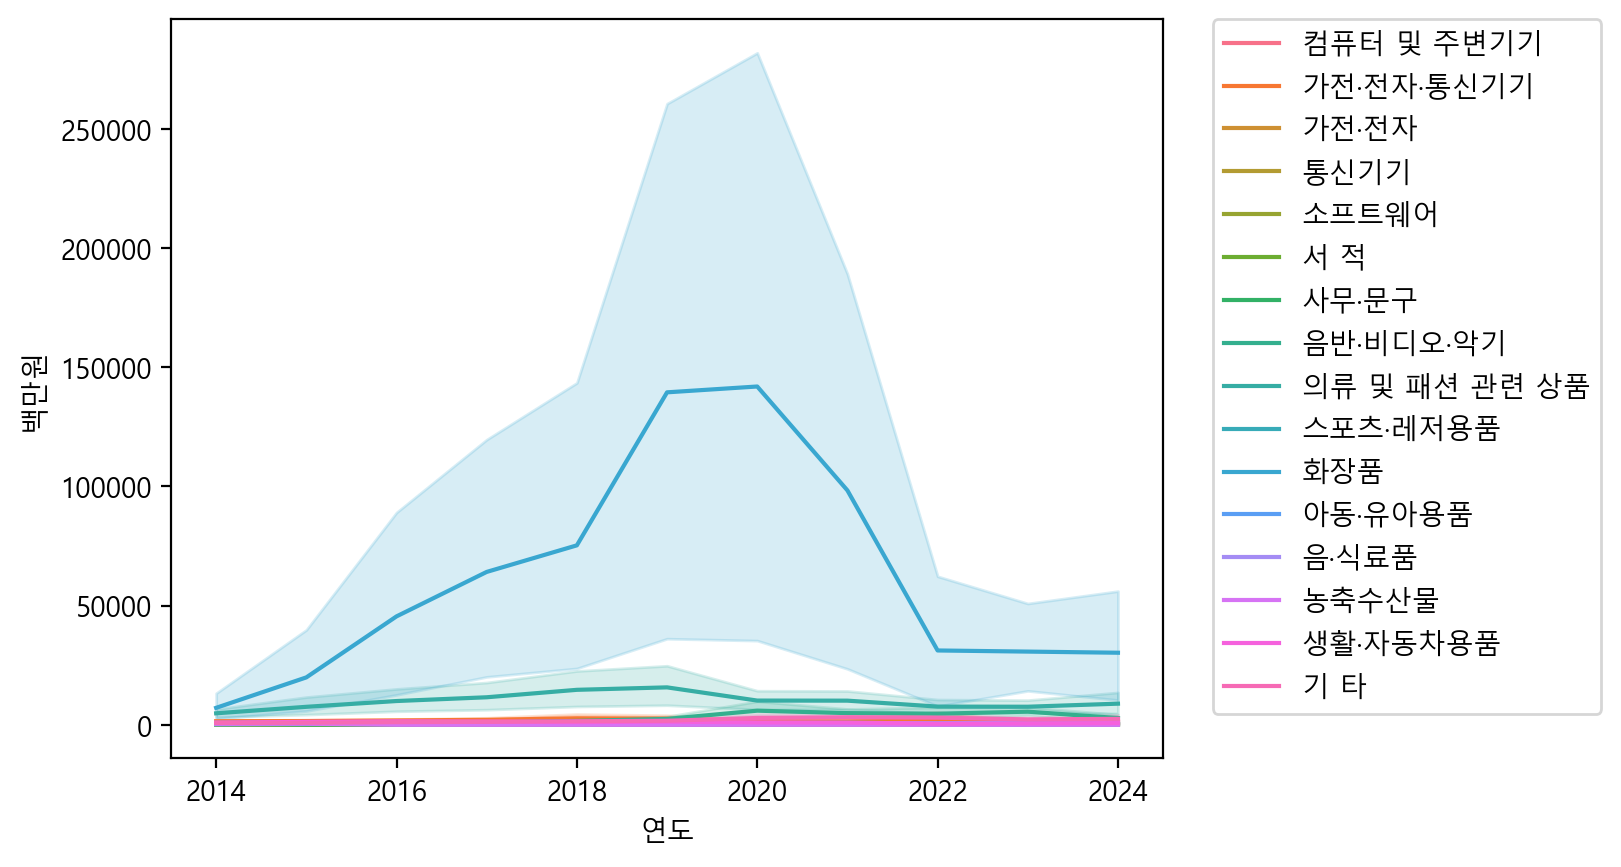

In [85]:
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

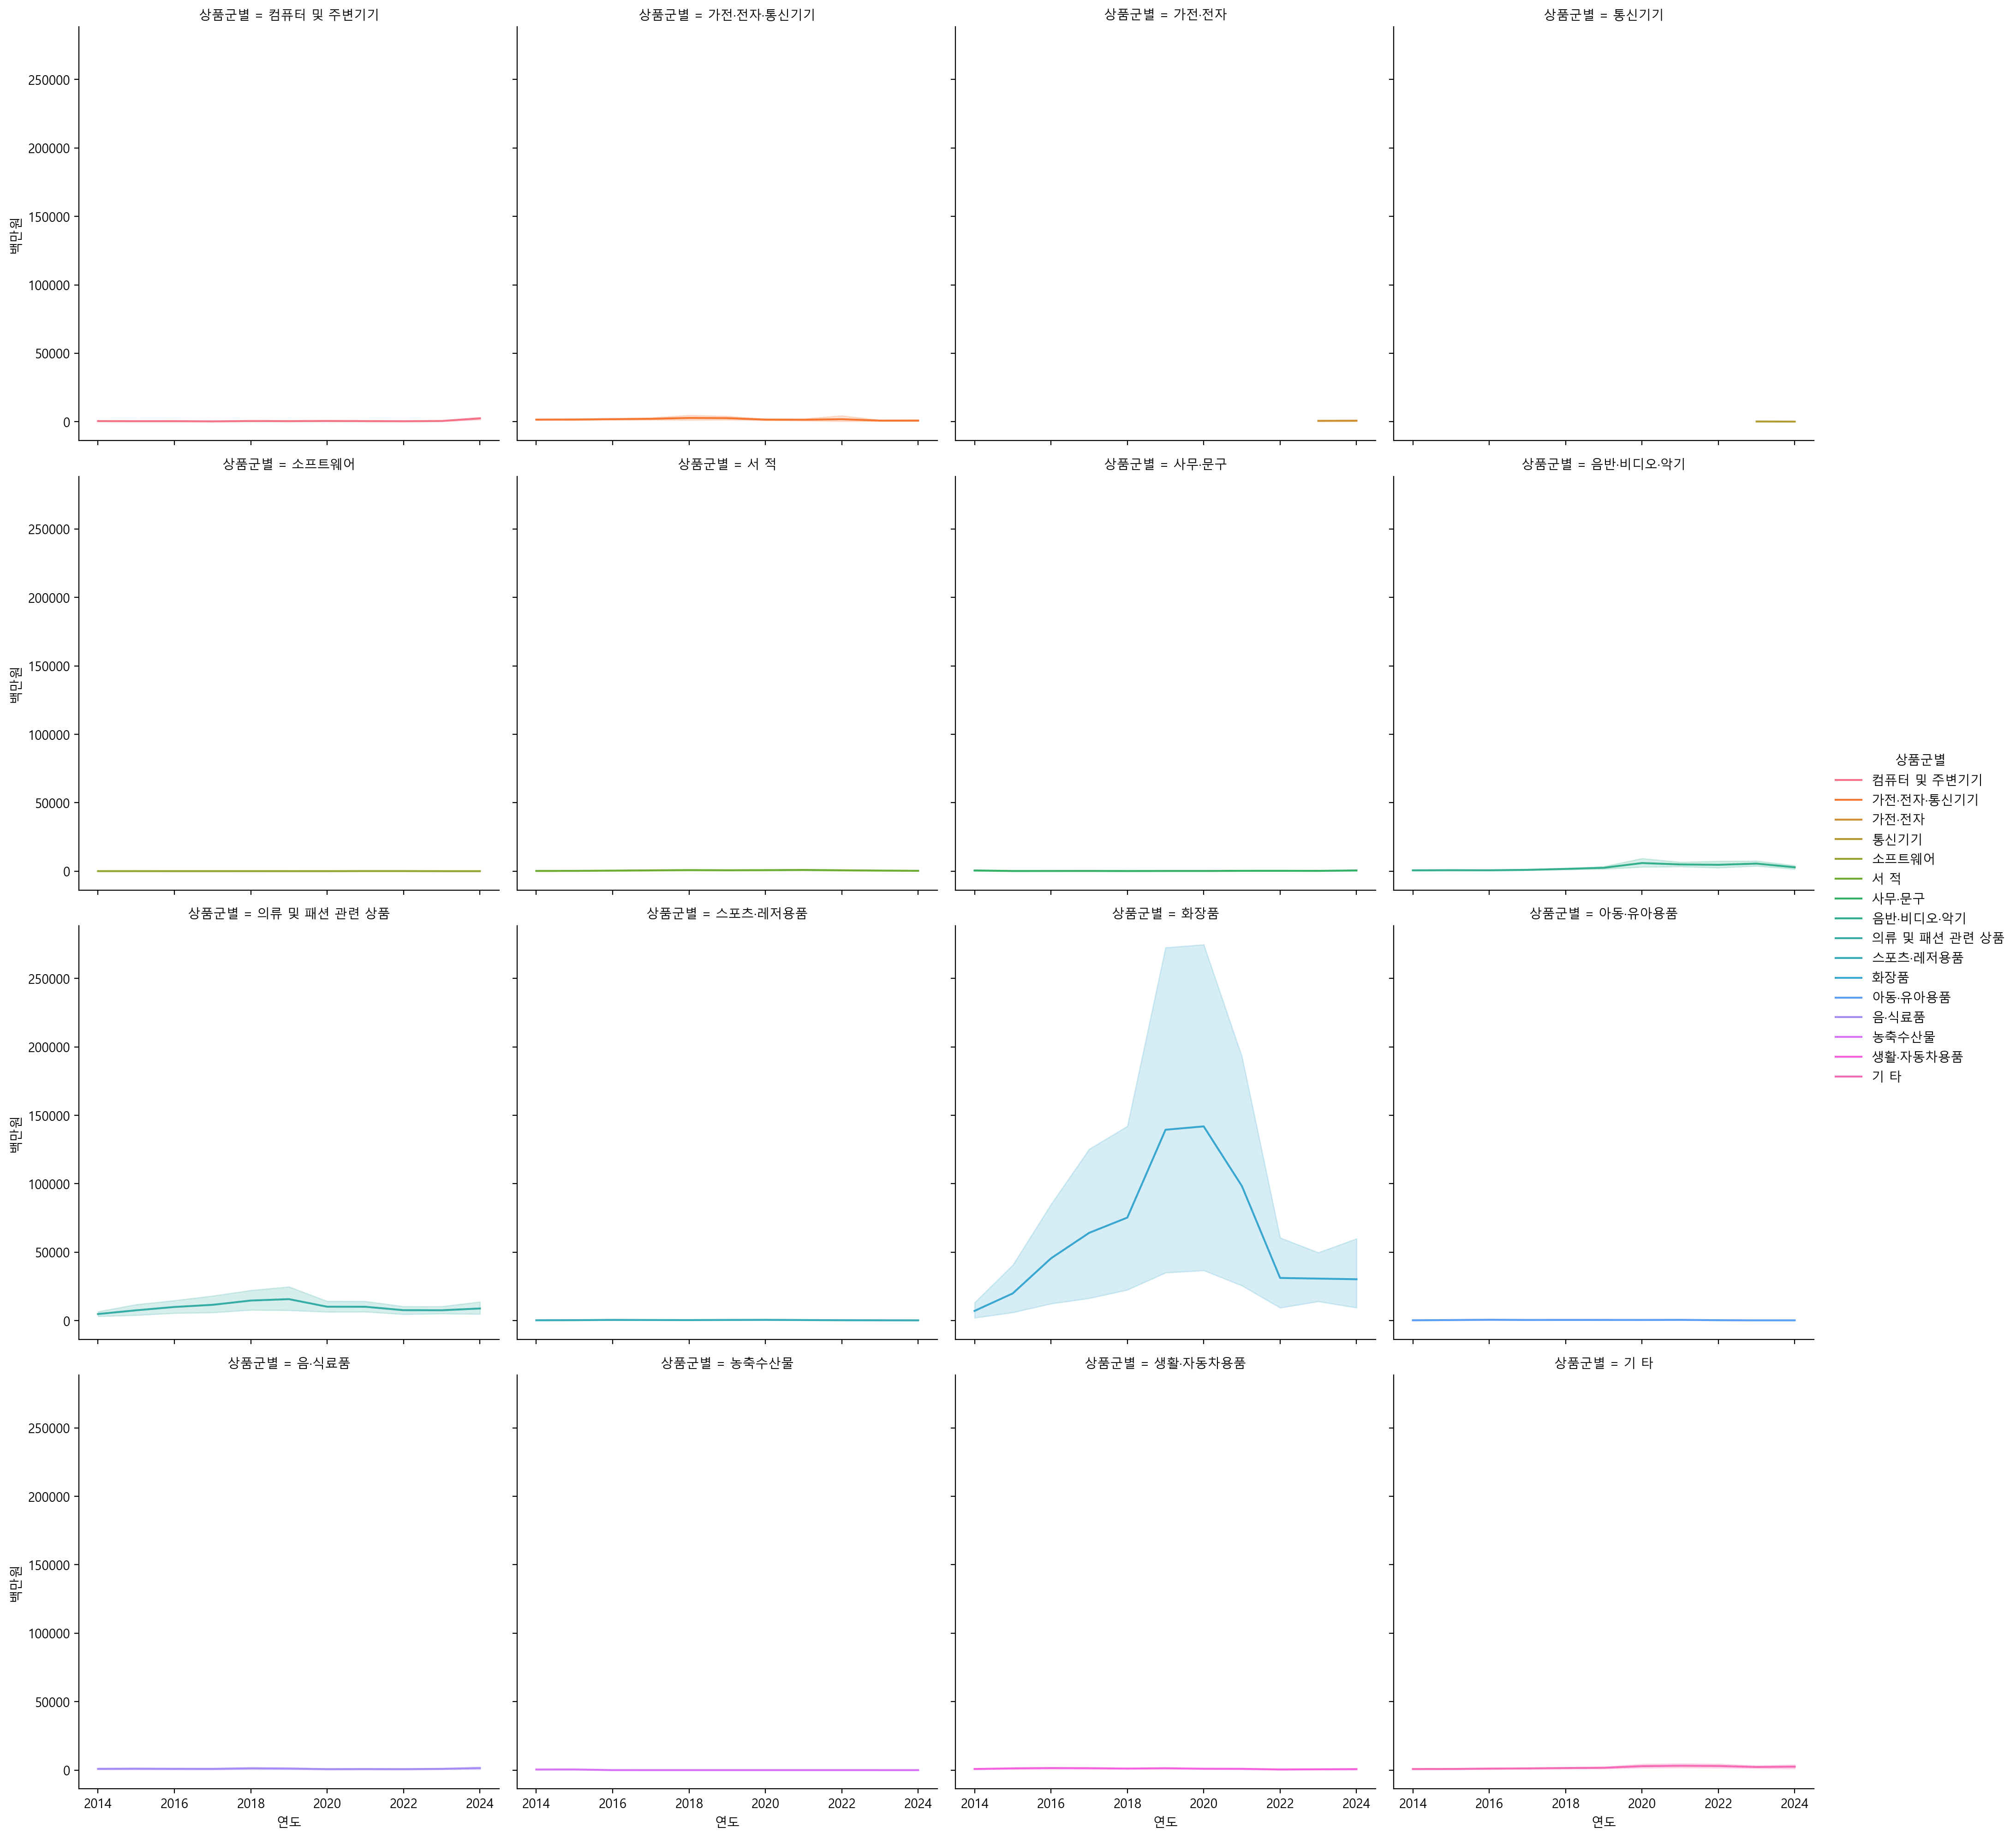

In [89]:
sns.relplot(data = df_total, x = "연도", y="백만원", hue = "상품군별", kind="line", col="상품군별", col_wrap=4)

In [95]:
df_sub = df_total[~df_total["상품군별"].isin(["화장품","의류 및 패션 관련 상품"])].copy()

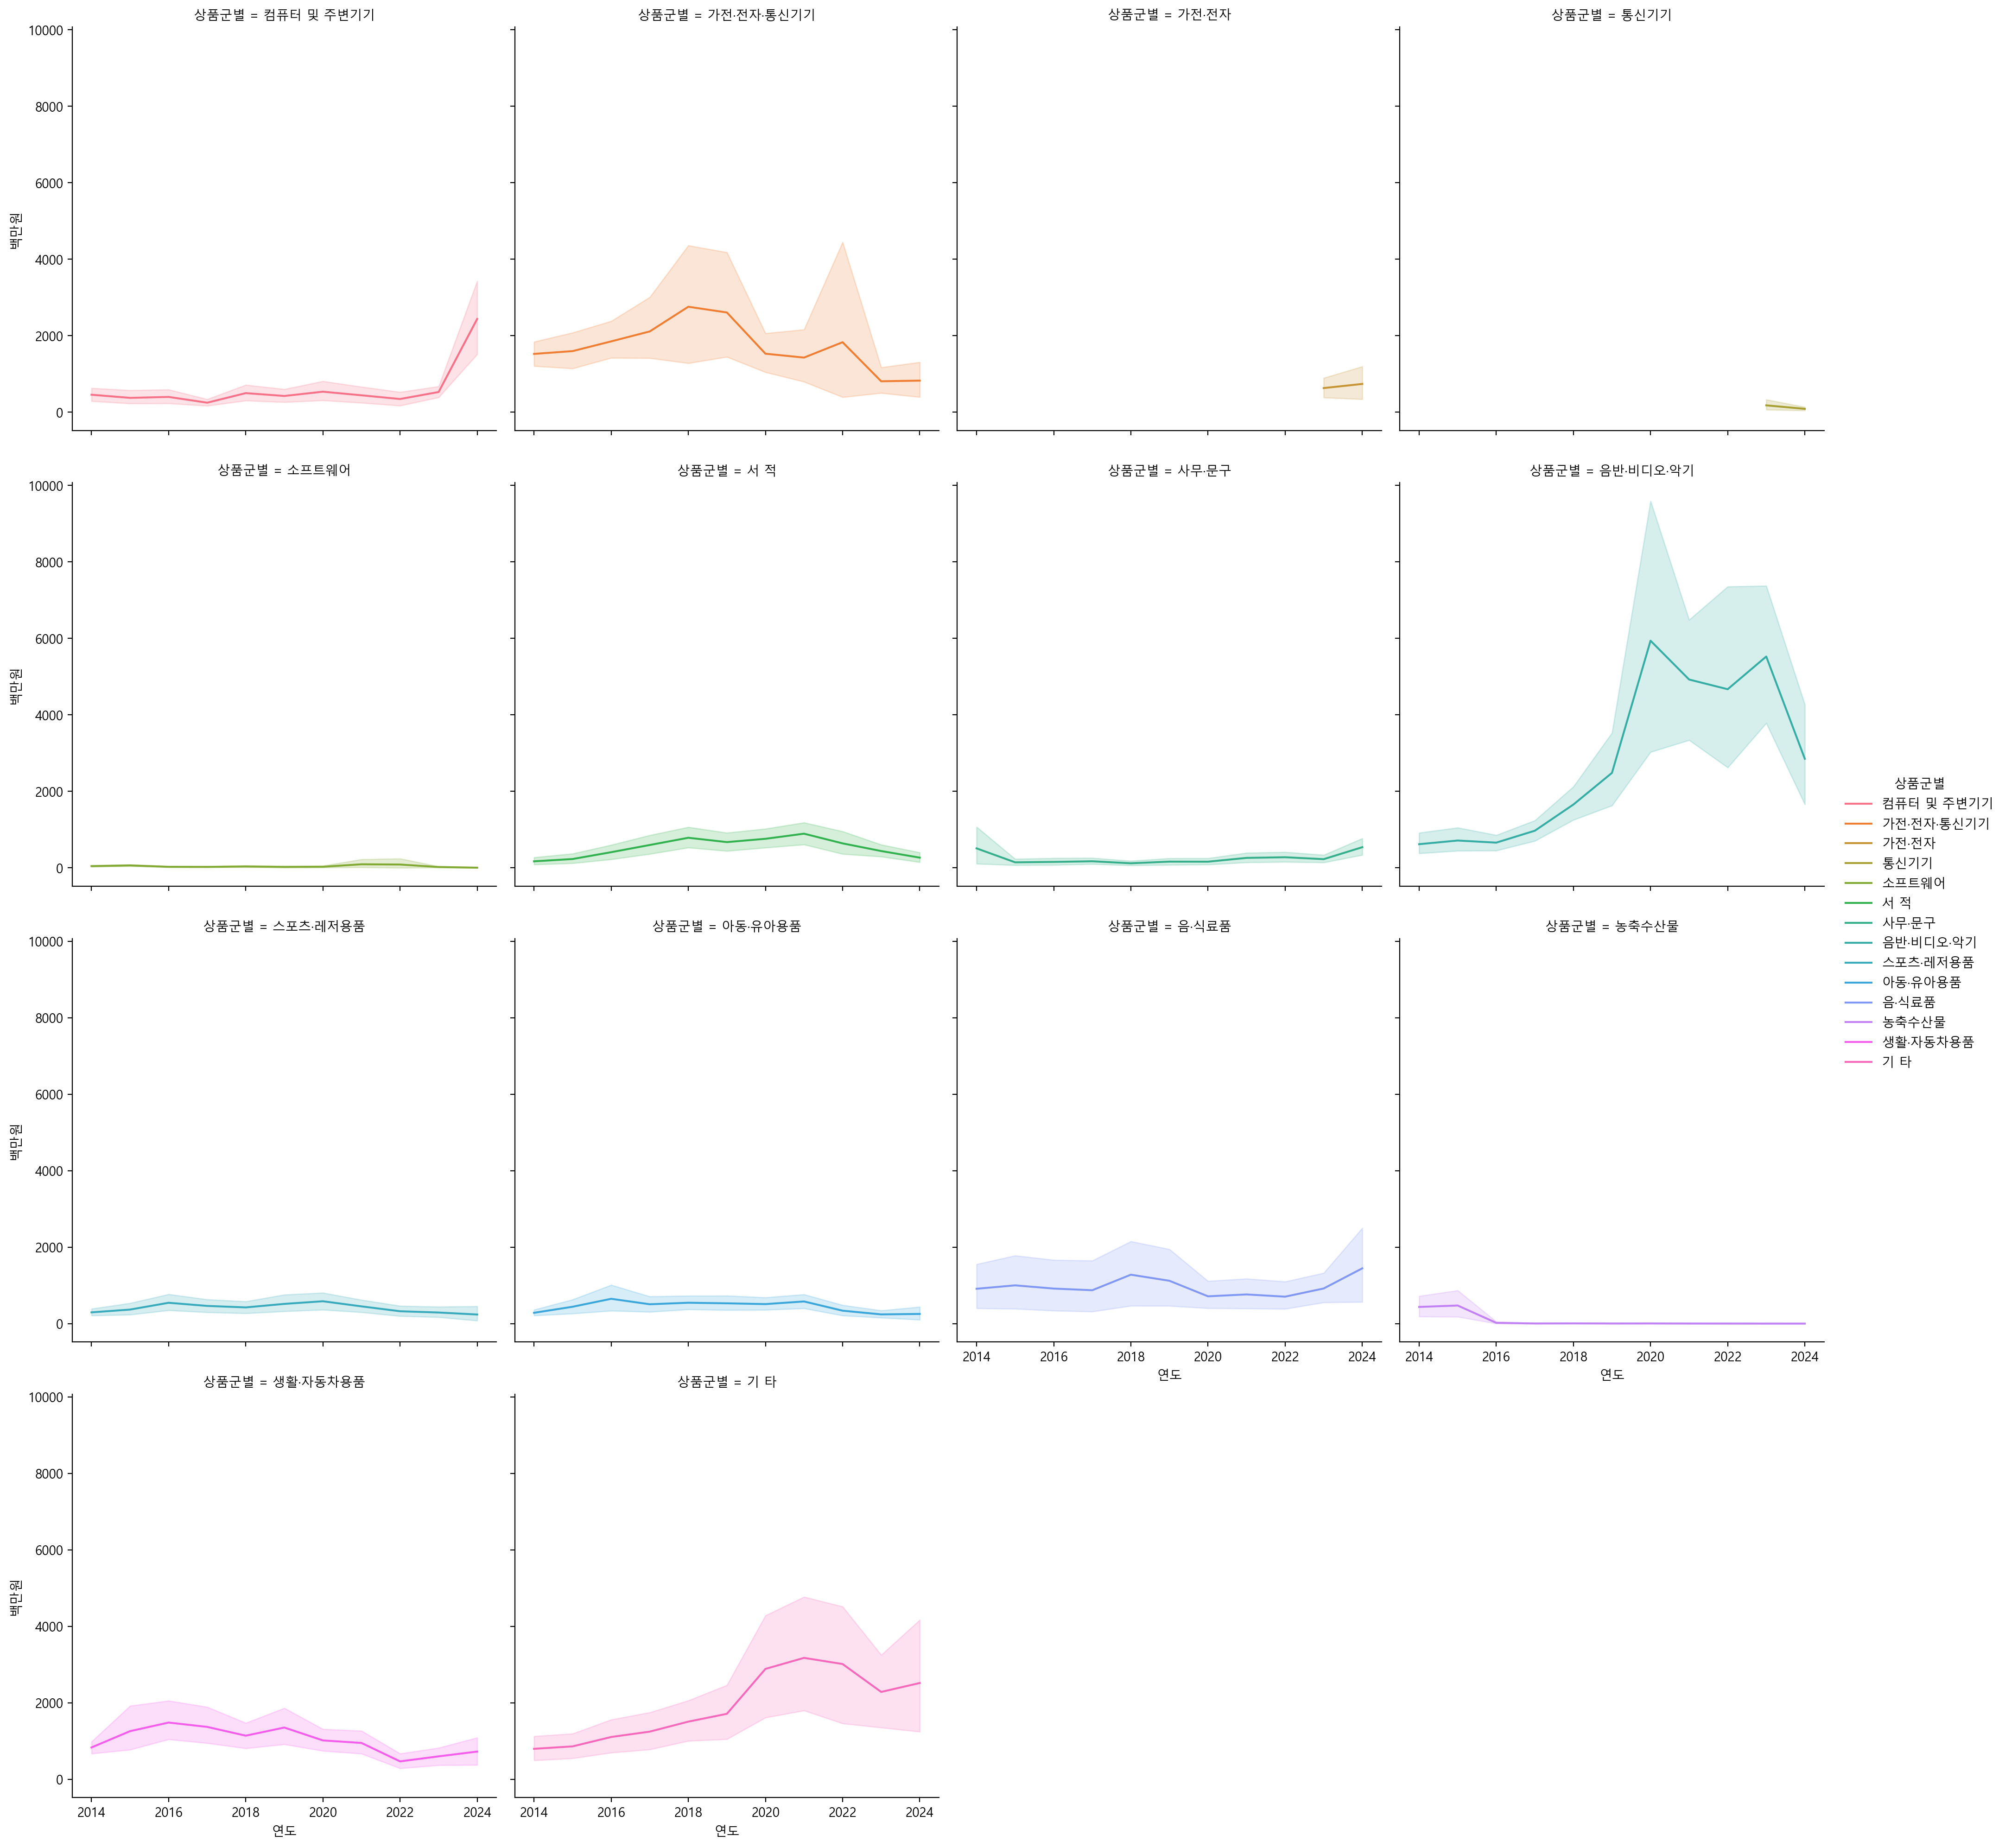

In [96]:
sns.relplot(data = df_sub, x = "연도", y="백만원", hue = "상품군별", kind="line", col="상품군별", col_wrap=4)

In [98]:
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()

In [133]:
df_cosmetic

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
84,아시아,화장품,계,2014.1/4,NaN,2014,1
135,중국,화장품,계,2014.1/4,32235.0,2014,1
186,일본,화장품,계,2014.1/4,1034.0,2014,1
237,아세안,화장품,계,2014.1/4,398.0,2014,1
288,중동,화장품,계,2014.1/4,418.0,2014,1
...,...,...,...,...,...,...,...
40476,기타 유럽,화장품,계,2024.2/4,149.0,2024,2
40527,대양주,화장품,계,2024.2/4,198.0,2024,2
40578,중남미,화장품,계,2024.2/4,33.0,2024,2
40629,아프리카,화장품,계,2024.2/4,125.0,2024,2


<AxesSubplot:xlabel='연도', ylabel='백만원'>

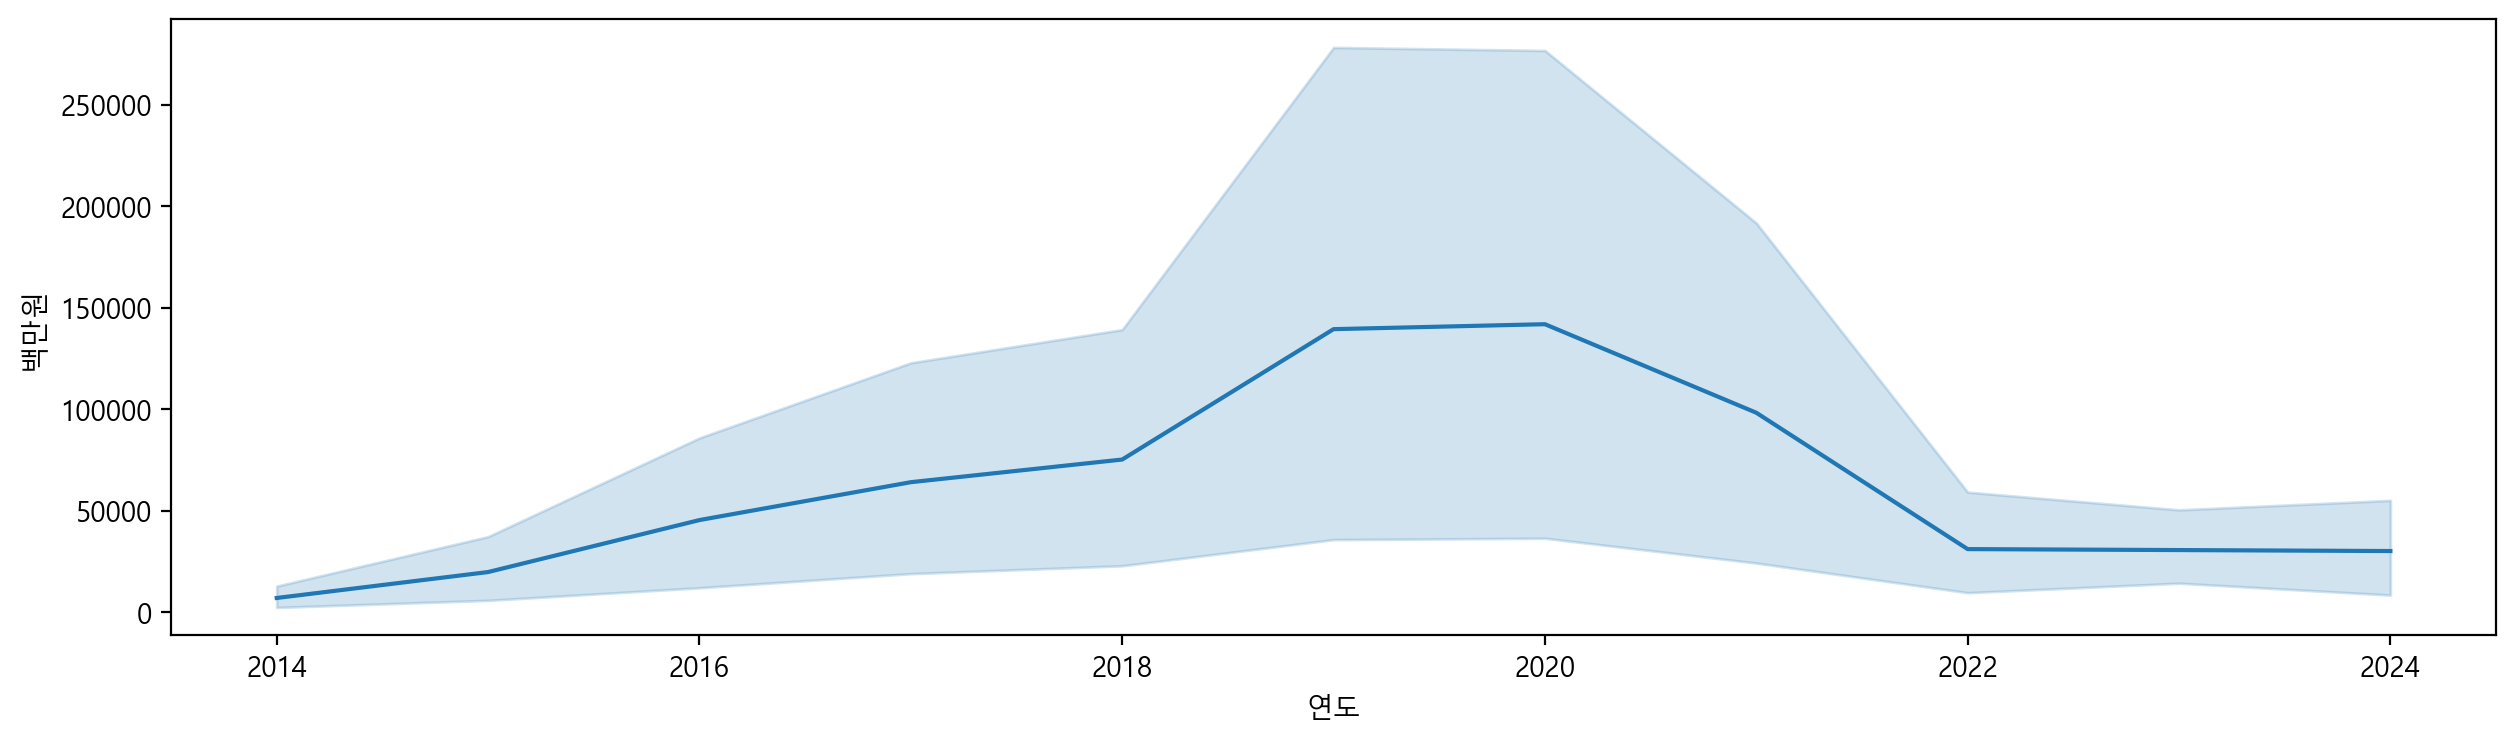

In [134]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

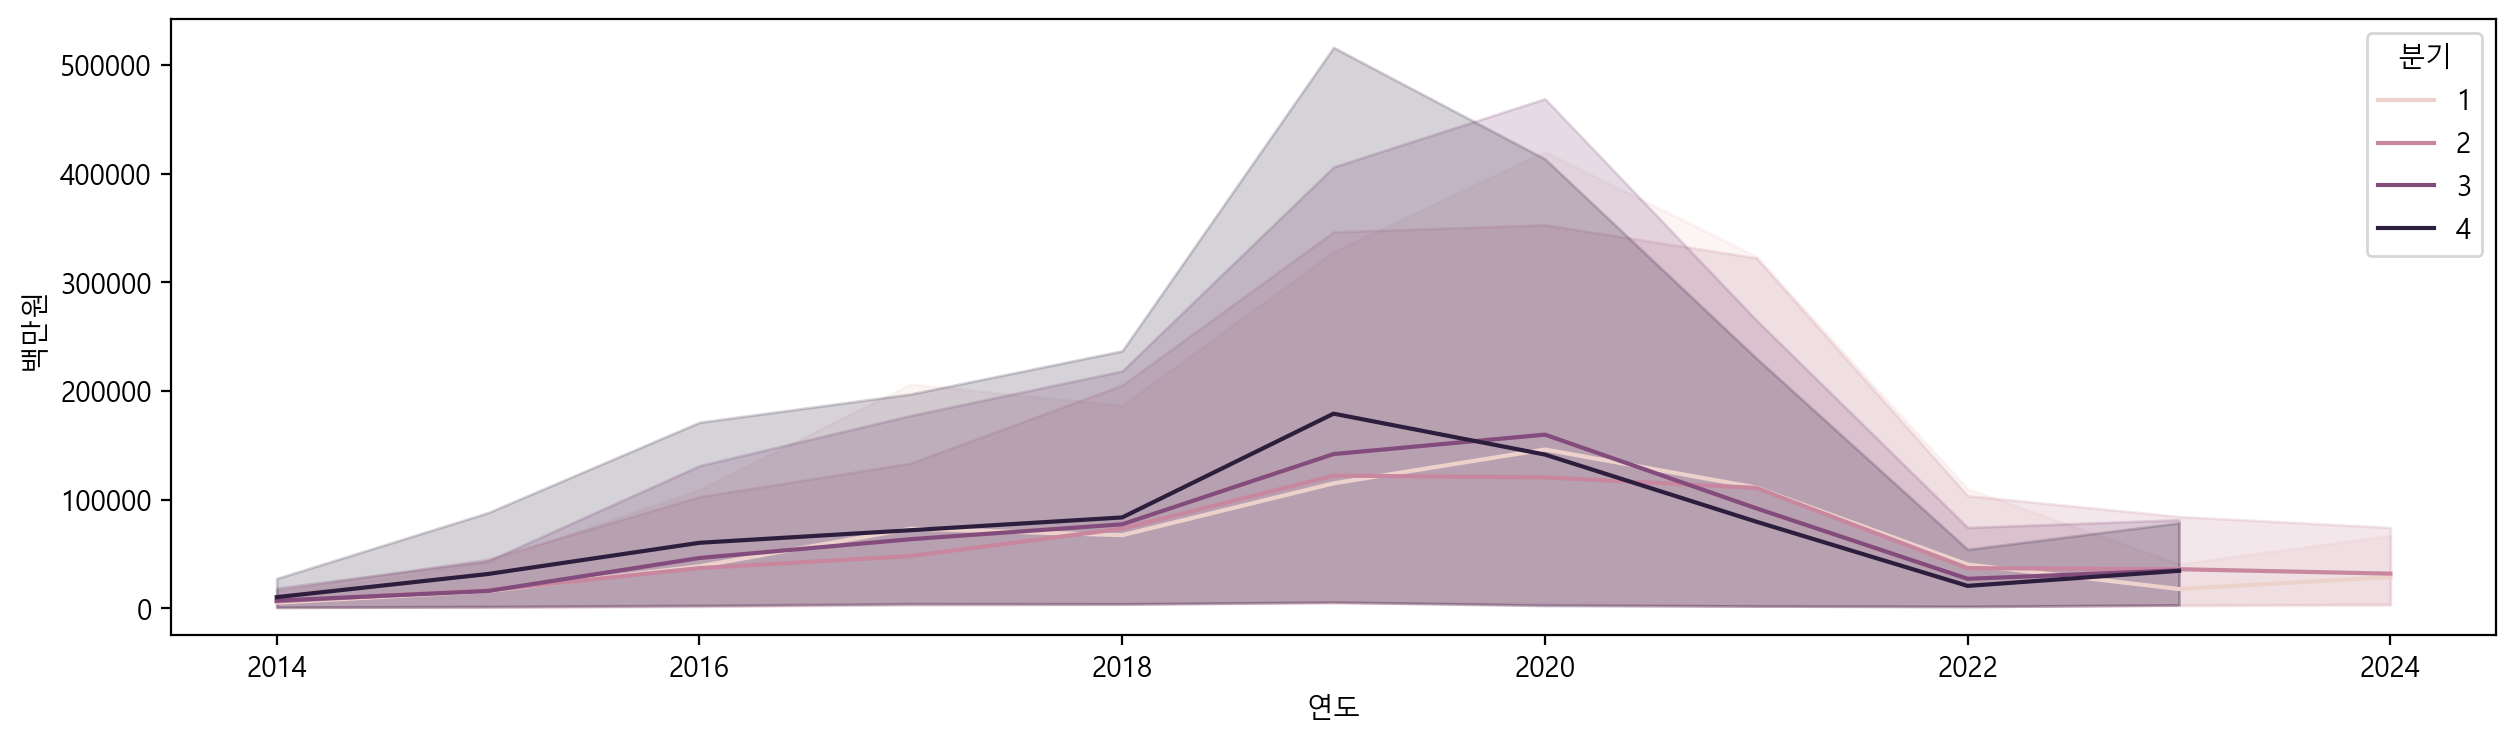

In [99]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

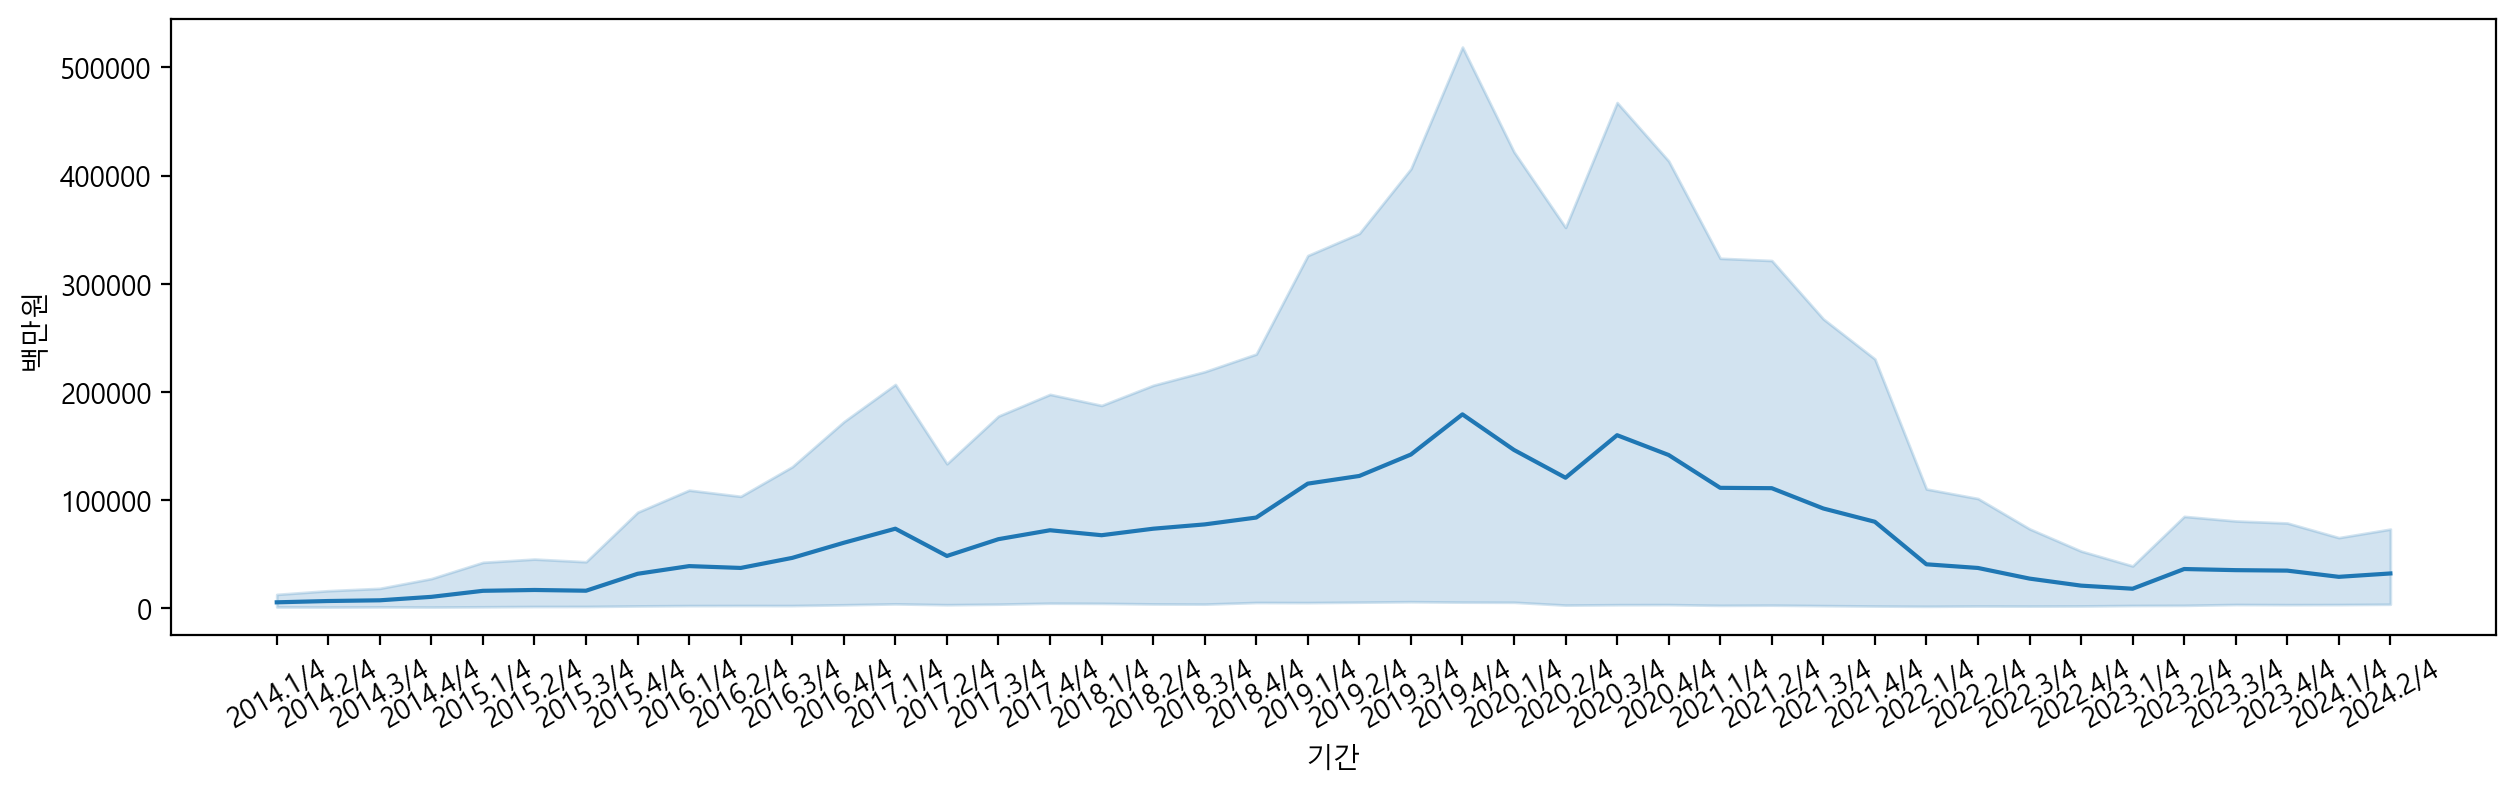

In [102]:
plt.figure(figsize=(15, 4))

plt.xticks(rotation = 30)

sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

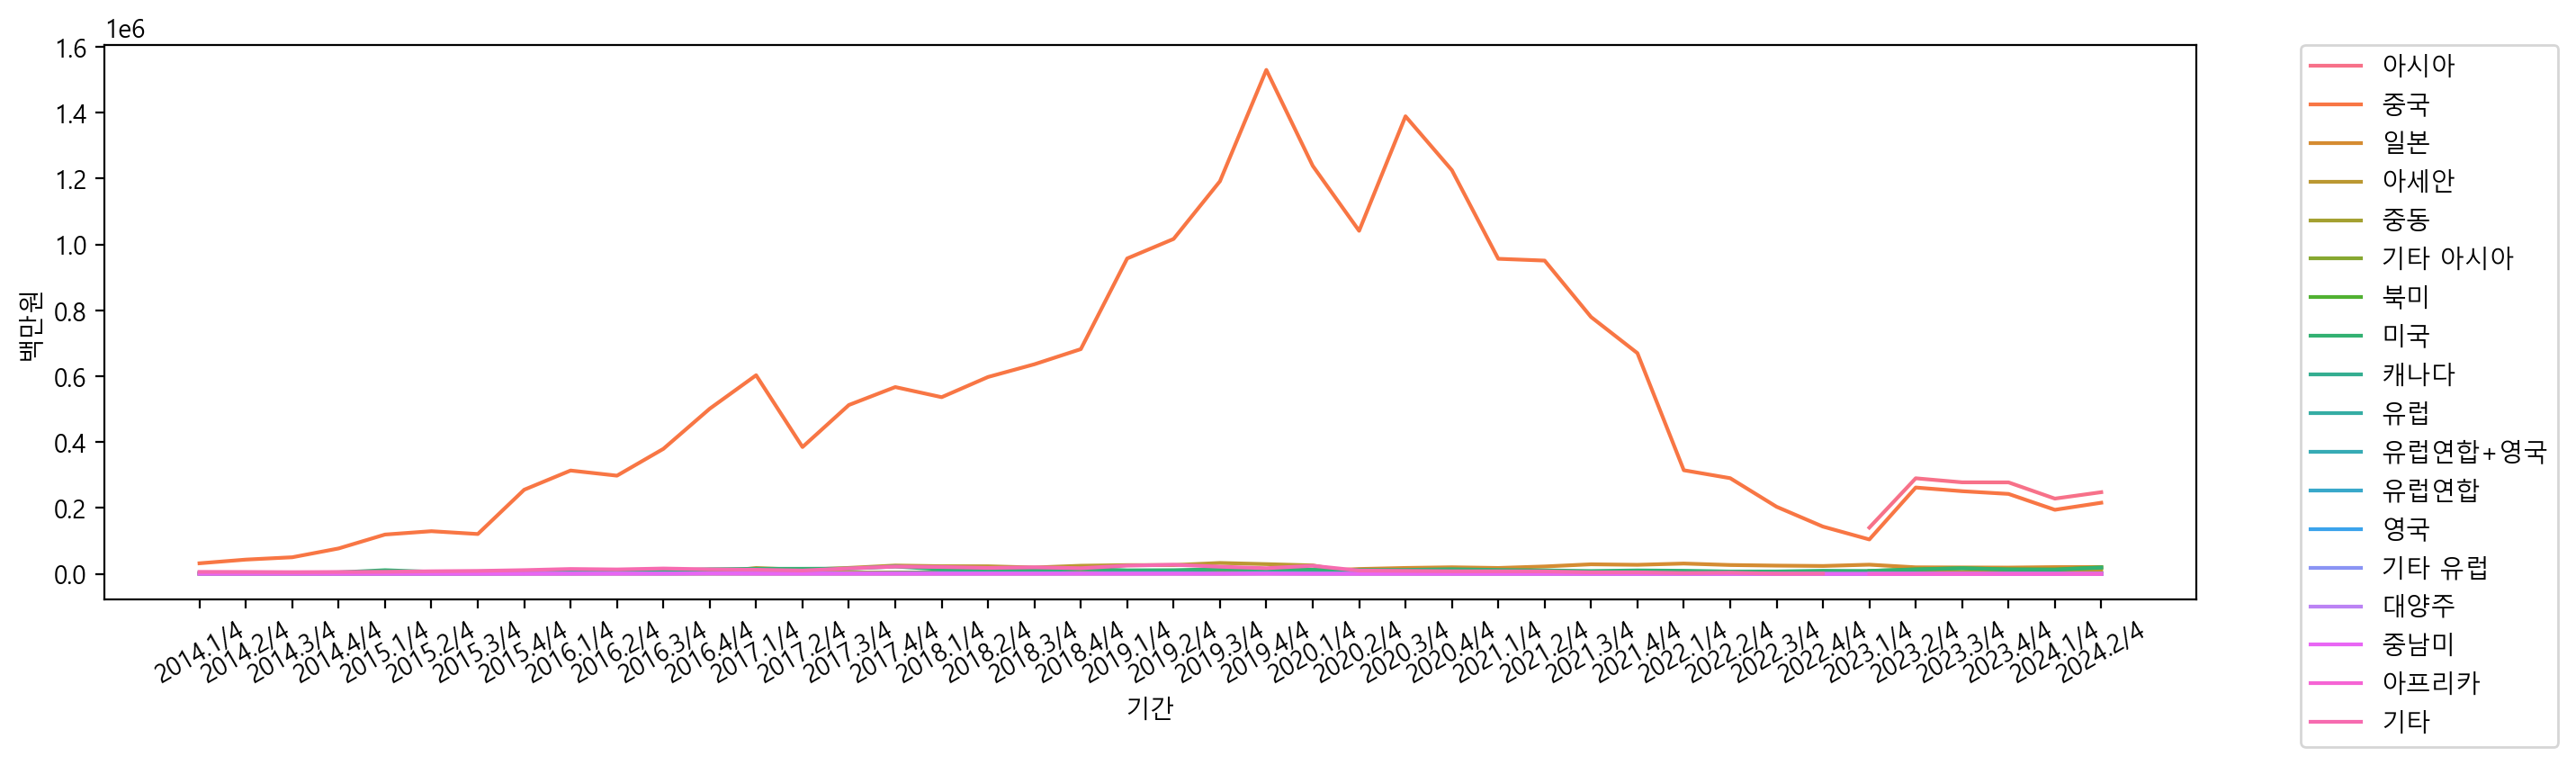

In [104]:
plt.figure(figsize=(15, 4))

plt.xticks(rotation = 30)

sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="지역별")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='기간', ylabel='백만원'>

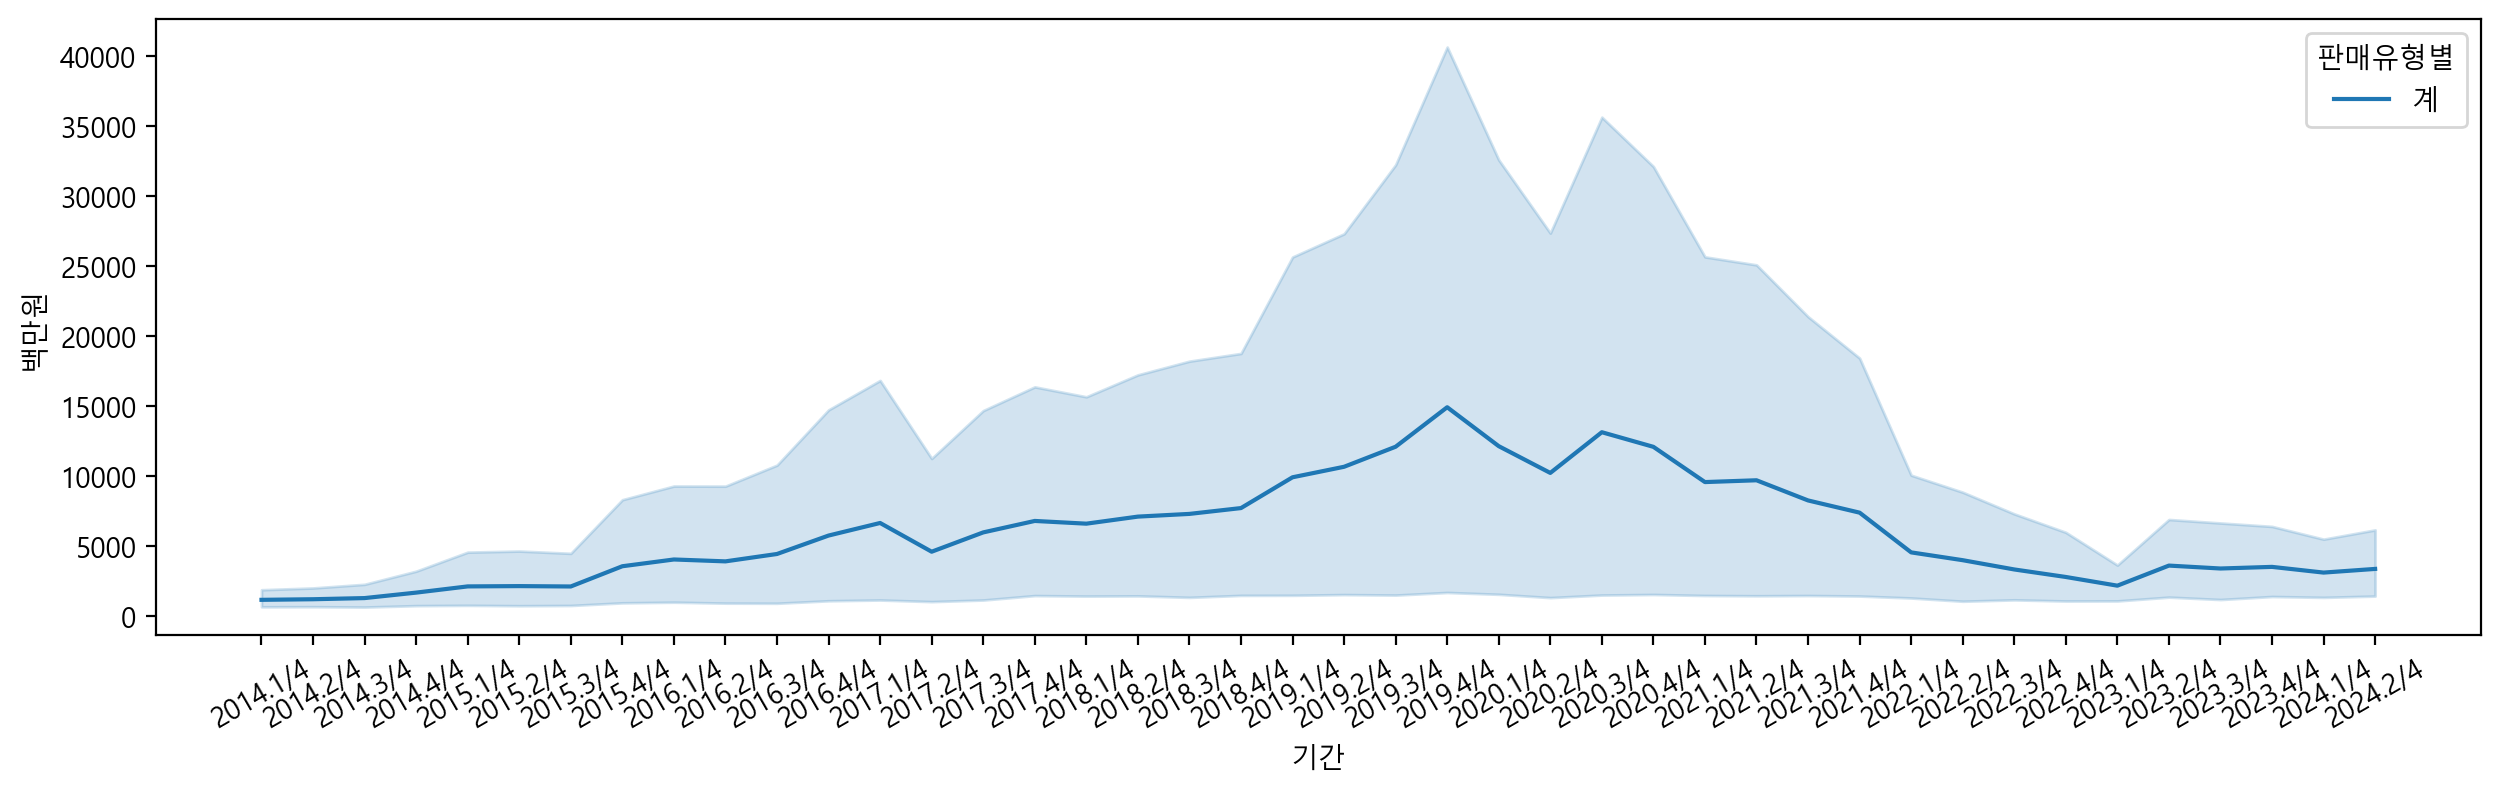

In [109]:
plt.figure(figsize=(15, 4))

plt.xticks(rotation = 30)

df_sub = df[df["판매유형별"] == "계"].copy()

sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

In [115]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] == "계")].copy()

df_fashion

,지역별,상품군별,판매유형별,기간,백만원,연도,분기
78,아시아,의류 및 패션 관련 상품,계,2014.1/4,NaN,2014,1
129,중국,의류 및 패션 관련 상품,계,2014.1/4,12206.0,2014,1
180,일본,의류 및 패션 관련 상품,계,2014.1/4,13534.0,2014,1
231,아세안,의류 및 패션 관련 상품,계,2014.1/4,3473.0,2014,1
282,중동,의류 및 패션 관련 상품,계,2014.1/4,342.0,2014,1
...,...,...,...,...,...,...,...
40470,기타 유럽,의류 및 패션 관련 상품,계,2024.2/4,36.0,2024,2
40521,대양주,의류 및 패션 관련 상품,계,2024.2/4,974.0,2024,2
40572,중남미,의류 및 패션 관련 상품,계,2024.2/4,20.0,2024,2
40623,아프리카,의류 및 패션 관련 상품,계,2024.2/4,0.0,2024,2


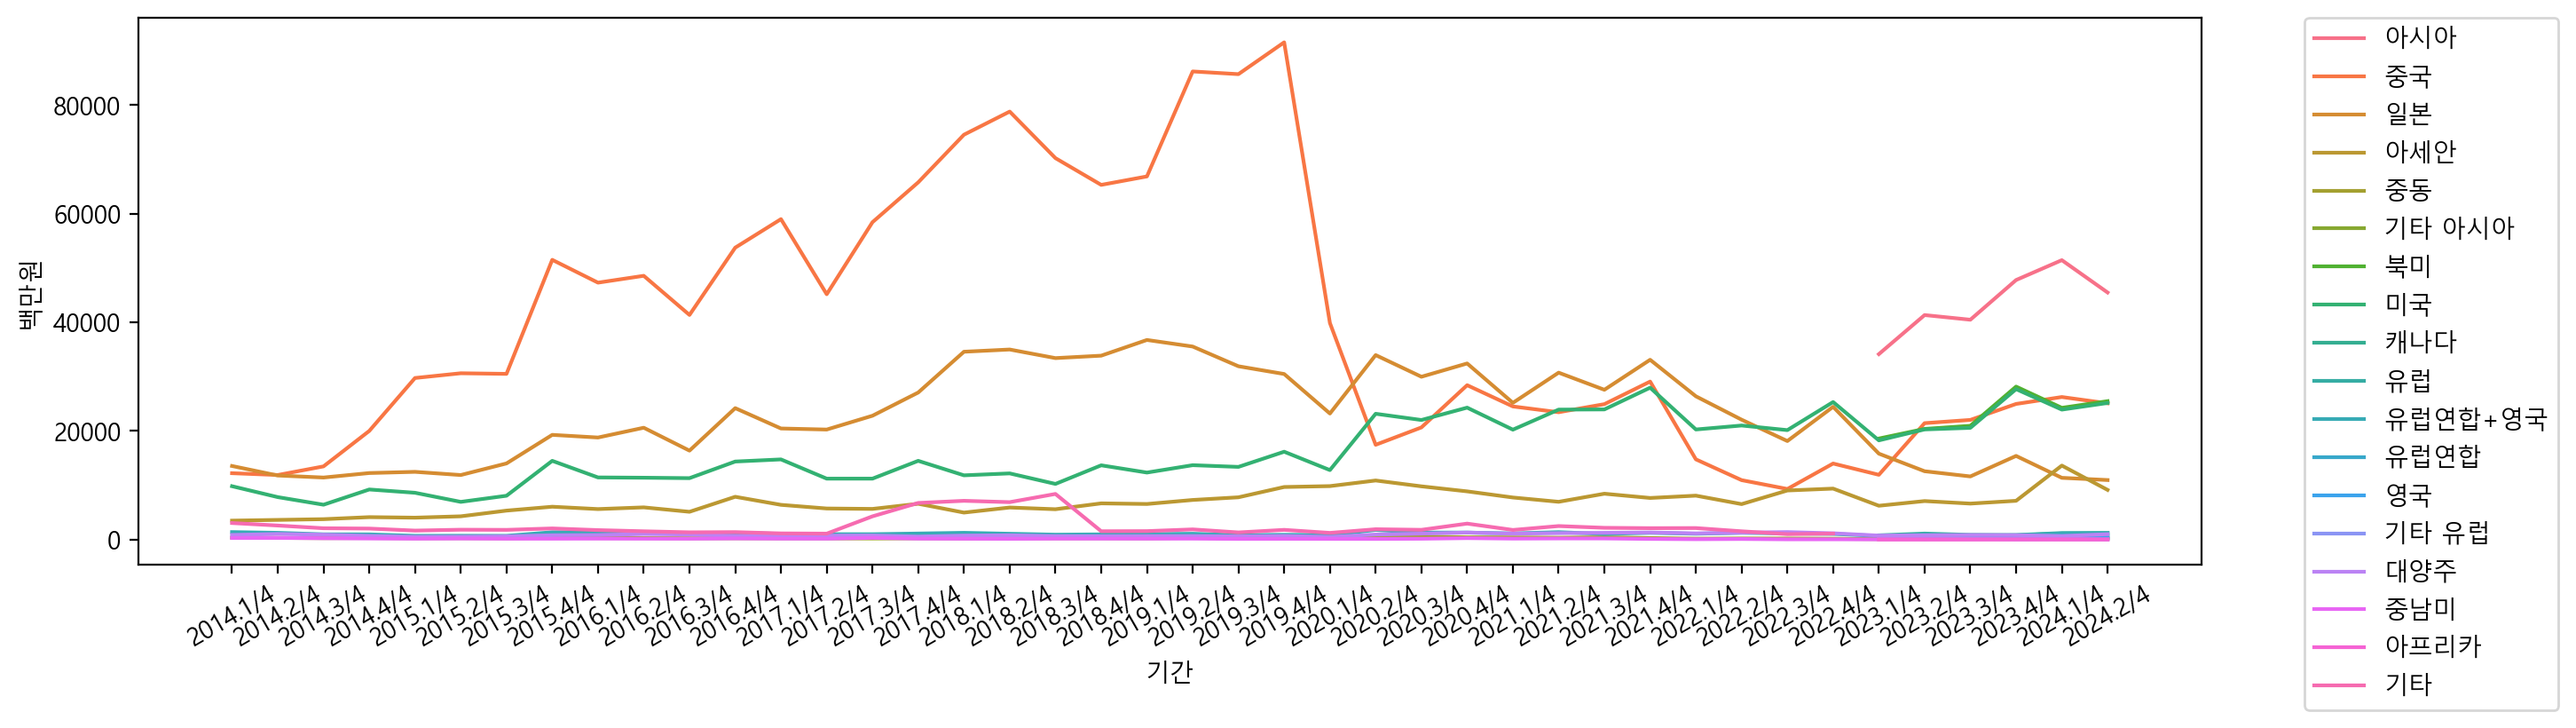

In [118]:
plt.figure(figsize=(15, 4))

plt.xticks(rotation = 30)

sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="지역별")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

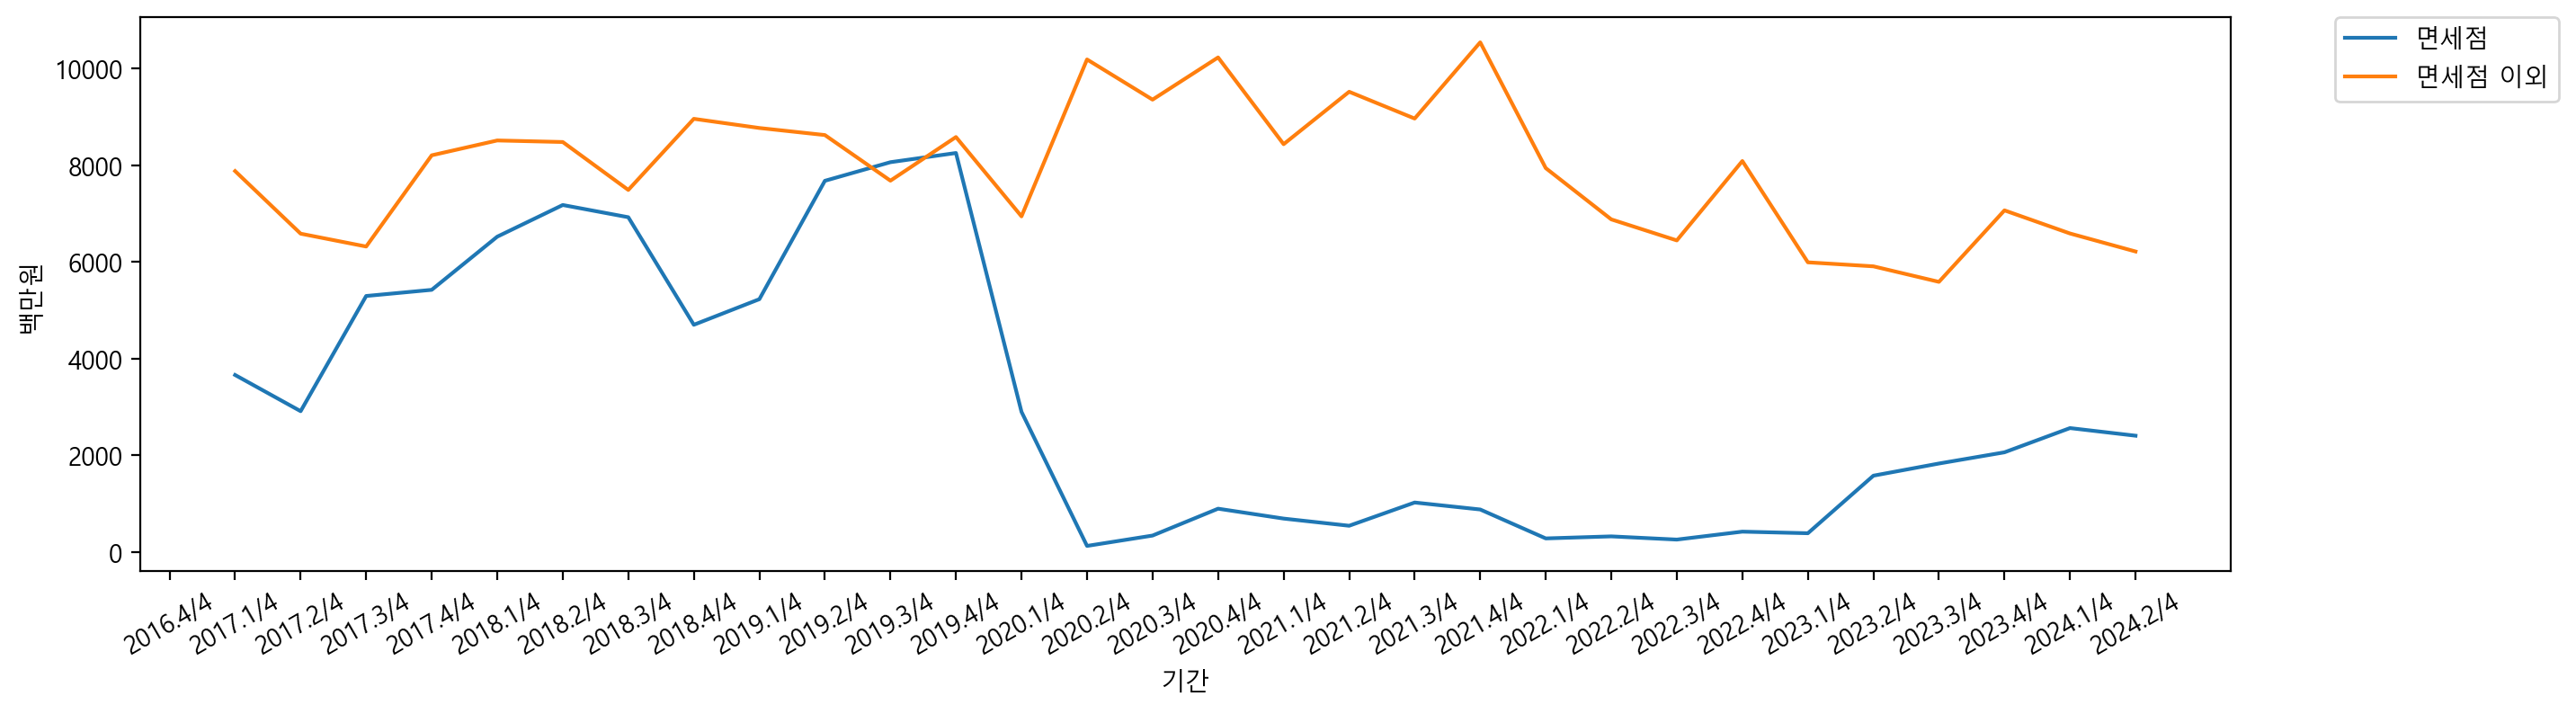

In [120]:
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련 상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))

plt.xticks(rotation = 30)

sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci =None)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [122]:
result = df_fashion.pivot_table(index="지역별",
                      columns="연도",
                      values="백만원",
                      aggfunc="sum")

<AxesSubplot:xlabel='연도', ylabel='지역별'>

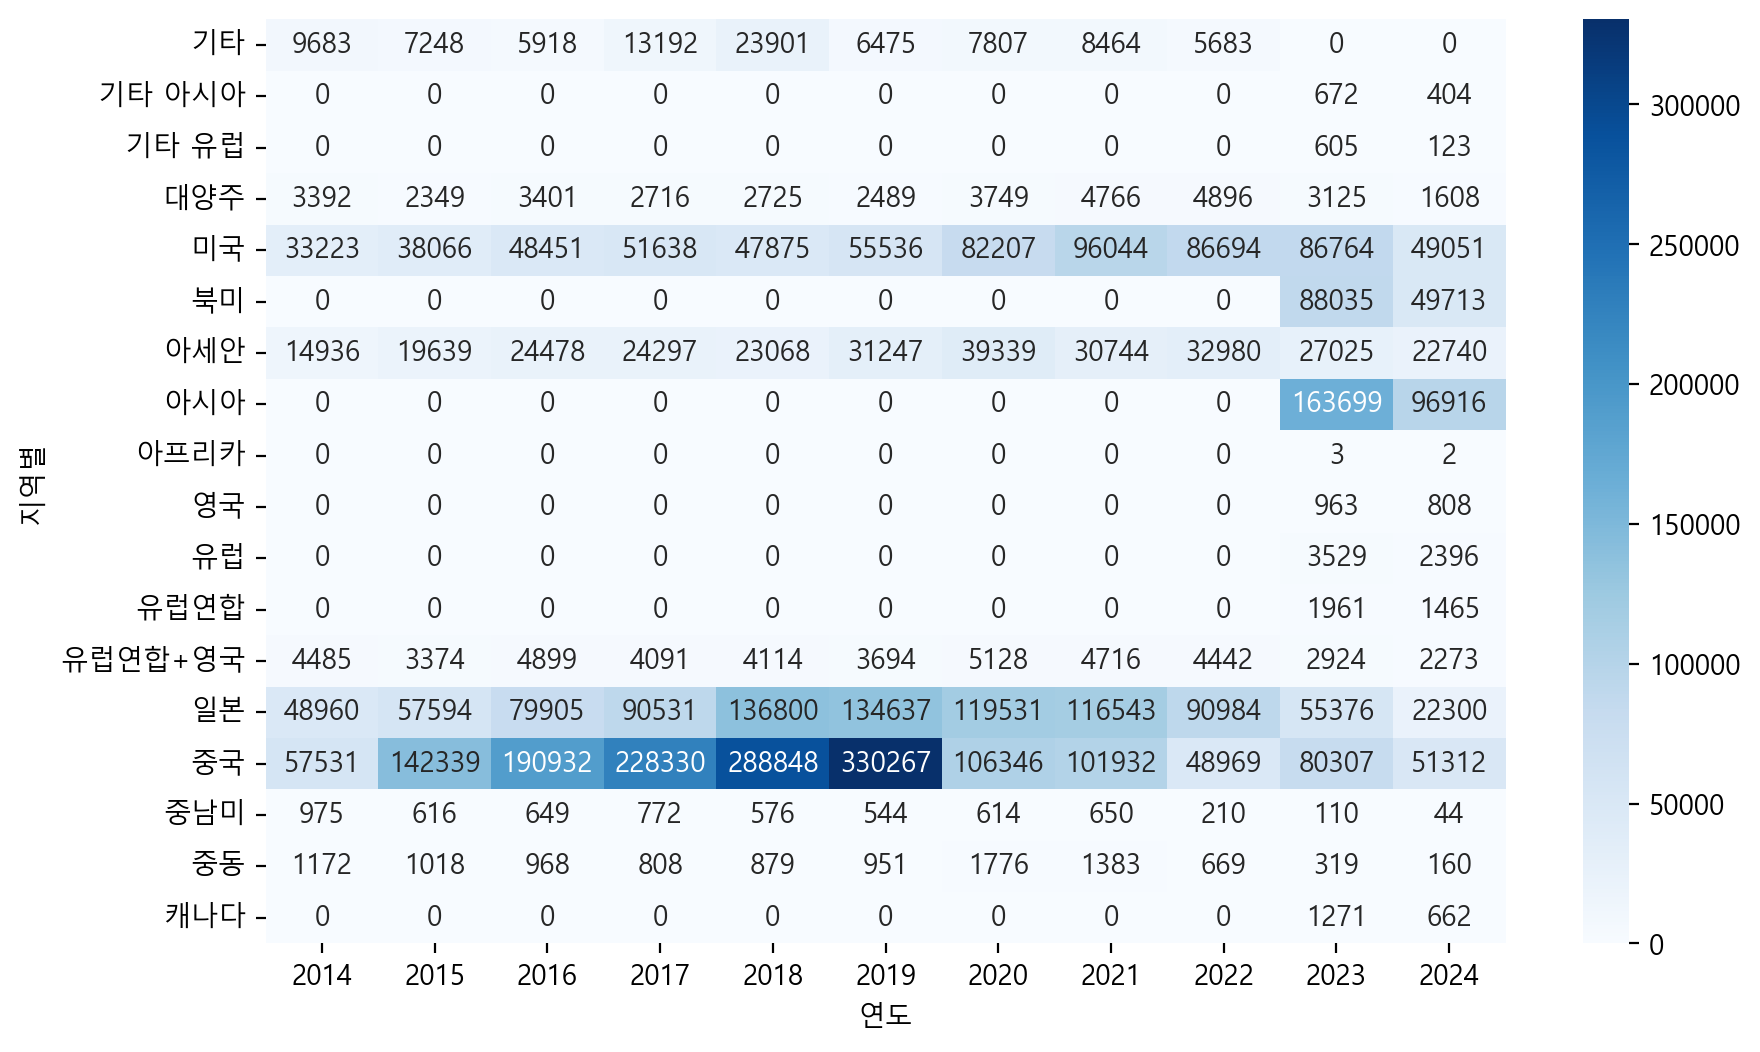

In [128]:
plt.figure(figsize=(10, 6))

sns.heatmap(result, cmap = "Blues", annot = True, fmt=".0f")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

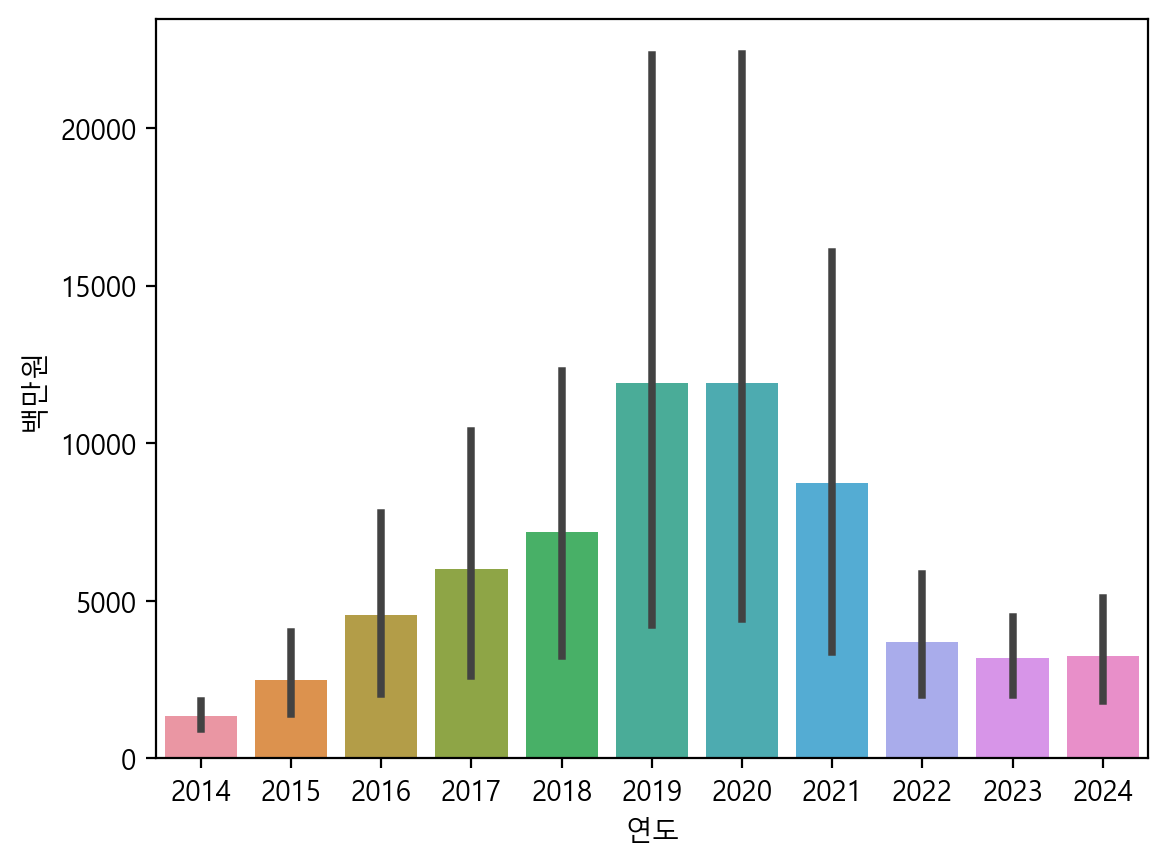

In [129]:
sns.barplot(data=df_total, x = "연도", y="백만원")

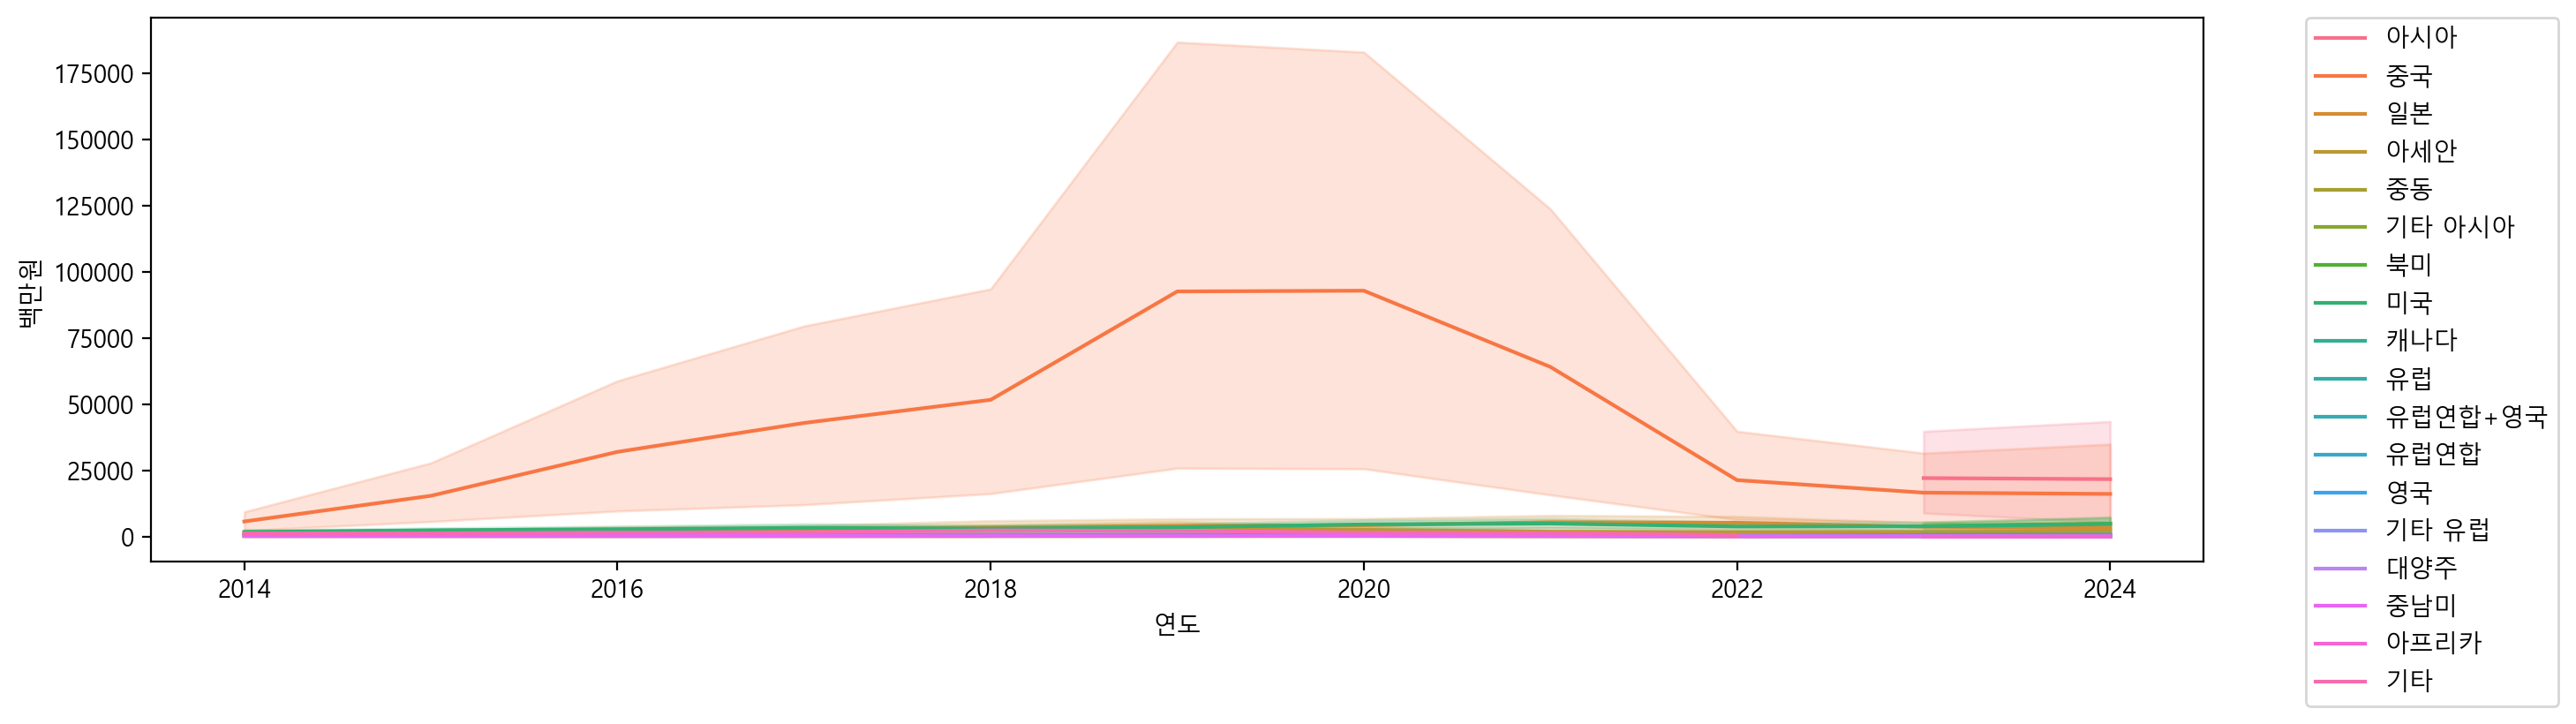

In [131]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=df_total, x = "연도", y="백만원", hue = "지역별")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

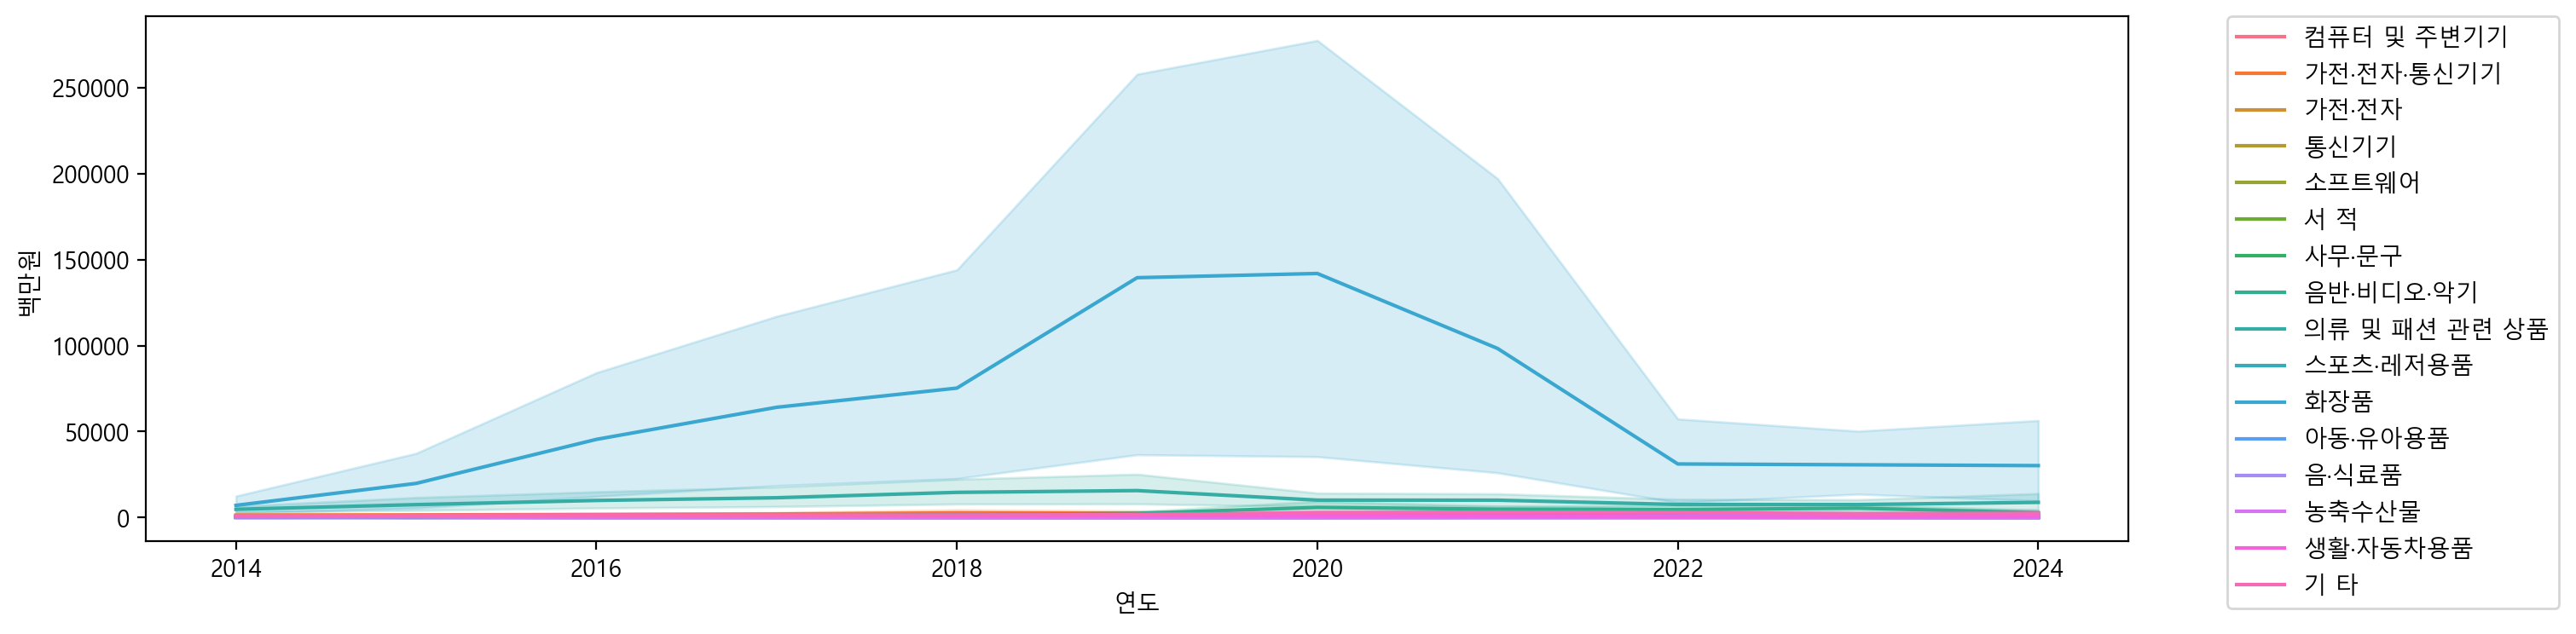

In [132]:
plt.figure(figsize=(15, 4))

sns.lineplot(data=df_total, x = "연도", y="백만원", hue = "상품군별")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)